In [99]:
#Dependencies
import os
import csv
import requests
import pandas as pd
import json
import numpy as np
import datetime
from scipy.stats import linregress
import matplotlib.pyplot as plt
from config import gkey
import gmaps


In [100]:
csv_path = "/Users/BK/Data/Project_One/csb_data/2016.csv"
csb_df_2016 = pd.read_csv(csv_path)

csb_df_2016.head()

,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,PHONE,NaN,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,36.0,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,B,NaN,Signal Dark,NaN,803600,901972.46,1019865.04,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,69.0,2016-01-05 00:00:00.0,4900 ANDERSON AVE,B,ST LOUIS,Whole Blk Lights Out,63115,803601,893349.58,1037162.15,CLOSED,"TRAFFIC DIVISION, 511",01
2,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 06:00:08.563,2016-01-01 01:22:48.133,Misc-Traffic Div,NaN,2016-01-21 00:00:00.0,4900 Anderson,B,NaN,Misc-Traffic Div,NaN,803602,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN
3,PHONE,NaN,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,55.0,2016-01-05 00:00:00.0,4900 WABADA AVE,B,NaN,Whole Blk Lights Out,NaN,803603,889953.32,1031461.42,CLOSED,"TRAFFIC DIVISION, 511",01
4,PHONE,NaN,2016-01-02 01:12:34.67,2016-01-02 01:13:25.89,2016-01-01 02:37:31.323,Whole block lights out,NaN,2016-01-05 00:00:00.0,Ray & Gustine,B,NaN,Whole Blk Lights Out,NaN,803604,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN


In [101]:
csv_path = "/Users/BK/Data/Project_One/csb_data/2017.csv"
csb_df_2017 = pd.read_csv(csv_path)

csb_df_2017.head()

,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,PHONE,NaN,2017-01-01 01:37:08.0,2017-01-01 01:40:28.893,2017-01-01 00:56:48.563,Misc-Street Div,36.0,2017-01-20 00:00:00.0,MARKET ST & S 16TH ST,B,NaN,Misc-Street Div,NaN,925943,904825.49,1017901.54,CLOSED,"STREET DIVISION, 514",07
1,PHONE,NaN,2017-01-02 15:00:00.0,2017-01-03 07:34:47.77,2017-01-01 03:15:00.763,Whole block lights out,85.0,2017-01-04 00:00:00.0,ATHLONE AVE & WEST FLORISSANT AVE,B,NaN,Whole Blk Lights Out,NaN,925944,899280.95,1035910.98,CLOSED,"TRAFFIC DIVISION, 511",21
2,WEB,NaN,2017-01-03 07:52:49.0,2017-01-31 15:42:47.367,2017-01-01 09:52:29.0,Check Welfare,2.0,2017-01-23 00:00:00.0,513 KOELN AVE,A,NaN,Check Welfare,NaN,925945,888524.86,989539.37,CLOSED,"ANIMAL CARE,",11
3,WEB,NaN,2017-01-03 15:53:44.0,2017-01-09 12:53:46.587,2017-01-01 11:44:27.0,Vehicle Towing,9.0,2017-01-10 00:00:00.0,6011 FYLER AVE,A,NaN,Vehicle Towing,NaN,925946,879599.22,1008098.65,CLOSED,"STREET DEPT, 510",23
4,WEB,NaN,2017-01-25 08:16:17.0,2017-01-25 08:16:06.117,2017-01-01 11:50:53.0,Stump Removal,38.0,2017-01-23 00:00:00.0,4256 MARYLAND AVE,A,NaN,Stump Removal,NaN,925947,891611.17,1022598.02,CLOSED,"FORESTRY,",18


In [102]:
csv_path = "/Users/BK/Data/Project_One/csb_data/2018.csv"
csb_df_2018 = pd.read_csv(csv_path, encoding="ISO-8859-1")

csb_df_2018.head()

,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,WEB,NaN,2018-01-05 16:22:19.0,2018-01-05 16:22:21.287,2018-01-01 00:48:30.0,WTR-COMING-UP,8,2018-01-15 00:00:00.0,75 WILLMORE RD,A,NaN,WTR-COMING-UP,NaN,1049265,875854.877,998434.947,CLOSED,"WATER DIV,",16
1,WEB,NaN,2018-01-05 16:22:19.0,2018-01-05 16:22:21.287,2018-01-01 00:48:30.0,WTR-COMING-UP,8,2018-01-15 00:00:00.0,75 WILLMORE RD,A,NaN,WTR-COMING-UP,NaN,1049265,875854.877,998434.947,CLOSED,"WATER DIV,",16
2,WEB,NaN,NaN,NaN,2018-01-01 05:29:06.0,"NOWATER (due to main break, etc.)",1,2018-01-15 00:00:00.0,6739 VERMONT AVE,A,NaN,NOWATER,NaN,1049266,889804.745,991410.133,Disptch,"WATER DIV,",11
3,WEB,NaN,2018-01-05 16:17:41.0,2018-01-05 16:18:08.673,2018-01-01 08:53:07.0,"NOWATER (due to main break, etc.)",7,2018-01-15 00:00:00.0,5444 ITASKA ST,A,NaN,NOWATER,NaN,1049267,881254.532,1001624.815,CLOSED,"WATER DIV,",16
4,PHONE,NaN,2018-01-01 10:40:14.0,2018-01-01 10:40:54.27,2018-01-01 09:13:22.777,Signal Stuck,60,2018-01-04 00:00:00.0,CASS AVE & N 20TH ST,B,NaN,Signal Stuck,NaN,1049268,904417.543,1023278.246,CLOSED,"TRAFFIC DIVISION, 511",05


In [103]:
frames = [csb_df_2016, csb_df_2017, csb_df_2018]

result = pd.concat(frames)

result.head(20)

,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,PHONE,NaN,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,36,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,B,NaN,Signal Dark,NaN,803600,901972.46,1019865.04,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,69,2016-01-05 00:00:00.0,4900 ANDERSON AVE,B,ST LOUIS,Whole Blk Lights Out,63115,803601,893349.58,1037162.15,CLOSED,"TRAFFIC DIVISION, 511",01
2,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 06:00:08.563,2016-01-01 01:22:48.133,Misc-Traffic Div,NaN,2016-01-21 00:00:00.0,4900 Anderson,B,NaN,Misc-Traffic Div,NaN,803602,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN
3,PHONE,NaN,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,55,2016-01-05 00:00:00.0,4900 WABADA AVE,B,NaN,Whole Blk Lights Out,NaN,803603,889953.32,1031461.42,CLOSED,"TRAFFIC DIVISION, 511",01
4,PHONE,NaN,2016-01-02 01:12:34.67,2016-01-02 01:13:25.89,2016-01-01 02:37:31.323,Whole block lights out,NaN,2016-01-05 00:00:00.0,Ray & Gustine,B,NaN,Whole Blk Lights Out,NaN,803604,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN
5,WEB,NaN,2016-01-04 10:53:54.373,NaN,2016-01-01 10:01:24.0,Cave-Ins,NaN,2016-01-06 00:00:00.0,1139 -1169 HAMILTON BLVD,A,NaN,Cave-Ins,NaN,803605,880435.75,1031043.76,Inspect,"STREET DEPT, 510",NaN
6,WEB,NaN,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,46,2016-01-12 00:00:00.0,5941 LINDELL BLVD,A,NaN,Hole-bottom of cont,NaN,803606,879037.91,1024778.73,CLOSED,"REFUSE,",28
7,WEB,NaN,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,25,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,B,NaN,Dead Animal,NaN,803607,893828.65,1005104.61,CLOSED,"REFUSE,",15
8,WEB,2016-01-04 10:21:23.08,NaN,NaN,2016-01-01 13:07:11.0,Debris-alley/street,54,2016-01-06 00:00:00.0,4638 ENRIGHT AVE,A,NaN,Debris-alley/street,NaN,803608,889666.81,1026244.48,CANCEL,"REFUSE,",18
9,WEB,NaN,2016-01-07 13:11:47.137,2016-01-07 13:12:01.847,2016-01-01 13:10:14.0,Did not get cart,42,2016-01-08 00:00:00.0,6538 NASHVILLE AV,A,NaN,Did not get cart,NaN,803609,878159.52,1016930.15,CLOSED,"REFUSE,",24


In [104]:
result.shape

(356304, 19)

In [105]:
result.count()

CALLERTYPE         316958
DATECANCELLED       11557
DATEINVTDONE       337397
DATETIMECLOSED     321821
DATETIMEINIT       356304
DESCRIPTION        356299
NEIGHBORHOOD       323868
PRJCOMPLETEDATE    354117
PROBADDRESS        353884
PROBADDTYPE        356304
PROBCITY            13500
PROBLEMCODE        356304
PROBZIP             15680
REQUESTID          356304
SRX                343439
SRY                343441
STATUS             356181
SUBMITTO           356128
WARD               326247
dtype: int64

In [106]:
result.columns

Index(['CALLERTYPE', 'DATECANCELLED', 'DATEINVTDONE', 'DATETIMECLOSED',
       'DATETIMEINIT', 'DESCRIPTION', 'NEIGHBORHOOD', 'PRJCOMPLETEDATE',
       'PROBADDRESS', 'PROBADDTYPE', 'PROBCITY', 'PROBLEMCODE', 'PROBZIP',
       'REQUESTID', 'SRX', 'SRY', 'STATUS', 'SUBMITTO', 'WARD'],
      dtype='object')

In [107]:
clean_columns = result[['CALLERTYPE', 'DATEINVTDONE', 'DATETIMECLOSED',
       'DATETIMEINIT', 'DESCRIPTION', 'PRJCOMPLETEDATE',
       'PROBADDRESS', 'PROBLEMCODE',
       'REQUESTID', 'STATUS', 'SUBMITTO', 'WARD']]
clean_columns.head(9)

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01
2,PHONE,2016-01-01 00:00:00.0,2016-01-01 06:00:08.563,2016-01-01 01:22:48.133,Misc-Traffic Div,2016-01-21 00:00:00.0,4900 Anderson,Misc-Traffic Div,803602,CLOSED,"TRAFFIC DIVISION, 511",NaN
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01
4,PHONE,2016-01-02 01:12:34.67,2016-01-02 01:13:25.89,2016-01-01 02:37:31.323,Whole block lights out,2016-01-05 00:00:00.0,Ray & Gustine,Whole Blk Lights Out,803604,CLOSED,"TRAFFIC DIVISION, 511",NaN
5,WEB,2016-01-04 10:53:54.373,NaN,2016-01-01 10:01:24.0,Cave-Ins,2016-01-06 00:00:00.0,1139 -1169 HAMILTON BLVD,Cave-Ins,803605,Inspect,"STREET DEPT, 510",NaN
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15
8,WEB,NaN,NaN,2016-01-01 13:07:11.0,Debris-alley/street,2016-01-06 00:00:00.0,4638 ENRIGHT AVE,Debris-alley/street,803608,CANCEL,"REFUSE,",18


In [108]:
years = clean_columns.rename(index=str, columns={"CALLERTYPE": "Comm Type", "DATEINVTDONE": "Date Done",
                                       "DATETIMECLOSED":"Date Closed", "DATETIMEINIT":"Date Requested",
                                       "DESCRIPTION":"Request Type", "NEIGHBORHOOD":"Neighborhood", 
                                       "PROBADDRESS":"Address", "REQUESTID":"Request ID",
                                       "STATUS":"Status", "SUBMITTO":"Department", "WARD":"Ward"})

In [109]:
years2 = years.dropna("index", how="any", subset=['Ward'])

In [110]:
nona_results = clean_columns.dropna()

nona_results

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15
9,WEB,2016-01-07 13:11:47.137,2016-01-07 13:12:01.847,2016-01-01 13:10:14.0,Did not get cart,2016-01-08 00:00:00.0,6538 NASHVILLE AV,Did not get cart,803609,CLOSED,"REFUSE,",24
10,WEB,2016-01-04 09:50:00.0,2016-01-04 21:48:46.323,2016-01-01 13:49:42.0,Sign needs attention,2016-01-06 00:00:00.0,DR MARTIN LUTHER KING DR & N CARDINAL AVE,Sign needs attention,803610,CLOSED,"TRAFFIC DIVISION, 511",19
11,WEB,2016-01-07 12:23:44.0,2016-02-11 12:26:55.8,2016-01-01 15:11:56.0,Leash Law,2016-01-22 00:00:00.0,2831 WINNEBAGO ST,Leash Law,803611,CLOSED,"ANIMAL CARE,",20
12,PHONE,2016-01-01 15:54:49.767,2016-01-01 15:55:37.177,2016-01-01 15:53:35.587,Signal Dark,2016-01-06 00:00:00.0,N GRAND AVE & COOK AVE,Signal Dark,803612,CLOSED,"TRAFFIC DIVISION, 511",19
14,WEB,2016-01-05 01:39:21.0,2016-01-07 01:39:57.953,2016-01-01 16:30:38.0,Single street light out,2016-01-06 00:00:00.0,5050 THRUSH AVE,Single Light Out,803614,CLOSED,"TRAFFIC DIVISION, 511",27


In [111]:
nona_results_idx = nona_results.set_index("REQUESTID")
nona_results_idx

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,STATUS,SUBMITTO,WARD
REQUESTID,,,,,,,,,,,
803600,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,CLOSED,"TRAFFIC DIVISION, 511",06
803601,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,CLOSED,"TRAFFIC DIVISION, 511",01
803603,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,CLOSED,"TRAFFIC DIVISION, 511",01
803606,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,CLOSED,"REFUSE,",28
803607,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,CLOSED,"REFUSE,",15
803609,WEB,2016-01-07 13:11:47.137,2016-01-07 13:12:01.847,2016-01-01 13:10:14.0,Did not get cart,2016-01-08 00:00:00.0,6538 NASHVILLE AV,Did not get cart,CLOSED,"REFUSE,",24
803610,WEB,2016-01-04 09:50:00.0,2016-01-04 21:48:46.323,2016-01-01 13:49:42.0,Sign needs attention,2016-01-06 00:00:00.0,DR MARTIN LUTHER KING DR & N CARDINAL AVE,Sign needs attention,CLOSED,"TRAFFIC DIVISION, 511",19
803611,WEB,2016-01-07 12:23:44.0,2016-02-11 12:26:55.8,2016-01-01 15:11:56.0,Leash Law,2016-01-22 00:00:00.0,2831 WINNEBAGO ST,Leash Law,CLOSED,"ANIMAL CARE,",20
803612,PHONE,2016-01-01 15:54:49.767,2016-01-01 15:55:37.177,2016-01-01 15:53:35.587,Signal Dark,2016-01-06 00:00:00.0,N GRAND AVE & COOK AVE,Signal Dark,CLOSED,"TRAFFIC DIVISION, 511",19


In [112]:
nona_results.dtypes

CALLERTYPE         object
DATEINVTDONE       object
DATETIMECLOSED     object
DATETIMEINIT       object
DESCRIPTION        object
PRJCOMPLETEDATE    object
PROBADDRESS        object
PROBLEMCODE        object
REQUESTID           int64
STATUS             object
SUBMITTO           object
WARD               object
dtype: object

In [113]:
descript = nona_results.DESCRIPTION.unique()
descript

array(['Signal Dark', 'Whole block lights out', 'Hole-bottom of cont',
       'Dead Animal', 'Did not get cart', 'Sign needs attention',
       'Leash Law', 'Single street light out', 'Vacnt Bldg Unsecured',
       'Graffiti-Public', 'Light Damaged', 'Cntnr out of postion',
       'Refuse not collected', 'Signal Bulb Out', 'Dangerous Animal',
       'Cntnr overflow/bulky', 'Not enough cntnrs', 'Rats (Exterior)',
       'Check Welfare ', 'Vehicle Towing', 'Inaccessible Facilty',
       'Unsanitary Pets, Ext', 'Debris-Occupied Bldg',
       'Other Street Repair', 'Graffiti-Private', 'Debris-Vacant Bldg',
       'Cave-Ins', 'Potholes - Alley', 'Comml Dumpster, Ext',
       'Signal Damaged', 'Bad Condition', 'Debris-alley/street',
       'Move container', 'Inspect City Tree', 'Stray Dog At Large',
       'Street Painting Requ', 'Blocking Application',
       'Bulky items missed', 'Unauthrz use contain', 'Containr damaged',
       'WTR-COMING-UP', 'Animal Bite', 'Opt Out Applctn Req',
     

In [114]:
len(descript)

325

In [115]:
new = nona_results["DATETIMEINIT"].str.split(" ", n = -1, expand = True) 
nona_results["initdate"]= new[0]


/Users/BK/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
nona_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01


In [117]:
new = nona_results["initdate"].str.split("-", n = -1, expand = True) 
nona_results["inityear"]= new[0] 

/Users/BK/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
nona_results["initmonth"]= new[1] 
nona_results["initday"] = new[2]

/Users/BK/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/BK/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
nona_results.head(50)

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01
9,WEB,2016-01-07 13:11:47.137,2016-01-07 13:12:01.847,2016-01-01 13:10:14.0,Did not get cart,2016-01-08 00:00:00.0,6538 NASHVILLE AV,Did not get cart,803609,CLOSED,"REFUSE,",24,2016-01-01,2016,01,01
10,WEB,2016-01-04 09:50:00.0,2016-01-04 21:48:46.323,2016-01-01 13:49:42.0,Sign needs attention,2016-01-06 00:00:00.0,DR MARTIN LUTHER KING DR & N CARDINAL AVE,Sign needs attention,803610,CLOSED,"TRAFFIC DIVISION, 511",19,2016-01-01,2016,01,01
11,WEB,2016-01-07 12:23:44.0,2016-02-11 12:26:55.8,2016-01-01 15:11:56.0,Leash Law,2016-01-22 00:00:00.0,2831 WINNEBAGO ST,Leash Law,803611,CLOSED,"ANIMAL CARE,",20,2016-01-01,2016,01,01
12,PHONE,2016-01-01 15:54:49.767,2016-01-01 15:55:37.177,2016-01-01 15:53:35.587,Signal Dark,2016-01-06 00:00:00.0,N GRAND AVE & COOK AVE,Signal Dark,803612,CLOSED,"TRAFFIC DIVISION, 511",19,2016-01-01,2016,01,01
14,WEB,2016-01-05 01:39:21.0,2016-01-07 01:39:57.953,2016-01-01 16:30:38.0,Single street light out,2016-01-06 00:00:00.0,5050 THRUSH AVE,Single Light Out,803614,CLOSED,"TRAFFIC DIVISION, 511",27,2016-01-01,2016,01,01


In [120]:
nona_results.dtypes

CALLERTYPE         object
DATEINVTDONE       object
DATETIMECLOSED     object
DATETIMEINIT       object
DESCRIPTION        object
PRJCOMPLETEDATE    object
PROBADDRESS        object
PROBLEMCODE        object
REQUESTID           int64
STATUS             object
SUBMITTO           object
WARD               object
initdate           object
inityear           object
initmonth          object
initday            object
dtype: object

In [121]:
requests_2016 = nona_results[(nona_results["inityear"].str.contains("2016") == True)]
requests_2017 = nona_results[(nona_results["inityear"].str.contains("2017") == True)]
requests_2018 = nona_results[(nona_results["inityear"].str.contains("2018") == True)]

In [122]:
group_2016 = requests_2016.groupby(['initmonth']).count()
group_2017 = requests_2017.groupby(['initmonth']).count()
group_2018 = requests_2018.groupby(['initmonth']).count()
overall = nona_results.groupby(['initmonth']).count()/3

In [123]:
overall

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initday
initmonth,,,,,,,,,,,,,,,
01,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333,5608.333333
02,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000
03,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000
04,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333,6650.333333
05,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000
06,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667,8984.666667
07,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667,9136.666667
08,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000
09,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000


In [124]:
x_axis = np.arange(len(group_2017))

In [125]:
width = 0.27
tick_locations = [value+width for value in x_axis]

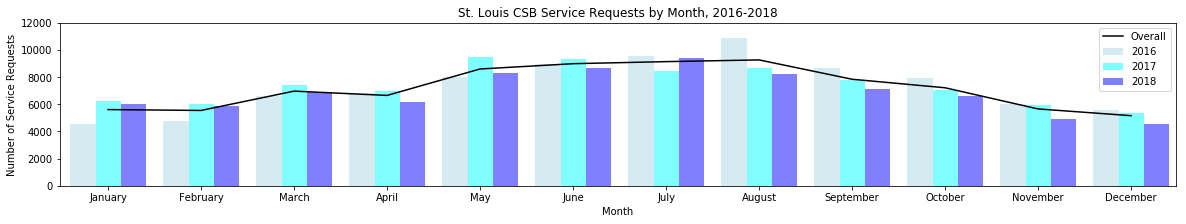

In [126]:

fig = plt.figure(figsize=(20,3))
plt.bar(x_axis, group_2016["REQUESTID"], width, color='lightblue', alpha=0.5, align="center")
plt.bar(x_axis+width, group_2017["REQUESTID"], width, color='aqua', alpha=0.5, align="center")
plt.bar(x_axis+width*2, group_2018["REQUESTID"], width, color='b', alpha=0.5, align="center")
plt.plot(x_axis+width, overall["REQUESTID"], color = 'black')
plt.autoscale(tight=True)
plt.xticks(tick_locations,['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation="horizontal")
plt.xlim(-0.25, len(x_axis)-0.25)
plt.ylim(0, 12000)
plt.title("St. Louis CSB Service Requests by Month, 2016-2018")
plt.xlabel("Month")
plt.ylabel("Number of Service Requests")
plt.legend(["Overall", "2016", "2017", "2018"])
plt.savefig("monthlytemp.png")


In [127]:
weather_path = "/Users/BK/Data/Project_One/csb_data/Weather.csv"
weather = pd.read_csv(weather_path)
weather.head()

,Month,Avg_Temp,YearMonth
0,January,33.8,2016_01
1,February,40.2,2016_02
2,March,53.0,2016_03
3,April,59.9,2016_04
4,May,66.4,2016_05


In [128]:
nona_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01


In [129]:
nona_results['YearMonth']=nona_results.apply(lambda x:'%s_%s' % (x['inityear'],x['initmonth']),axis=1)

/Users/BK/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
nona_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday,YearMonth
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01,2016_01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01,2016_01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01,2016_01


In [131]:
grouped = nona_results.groupby(['YearMonth']).count()
grouped


,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday
YearMonth,,,,,,,,,,,,,,,,
2016_01,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561
2016_02,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774
2016_03,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575
2016_04,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858
2016_05,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007
2016_06,8963,8963,8963,8963,8963,8963,8963,8963,8963,8963,8963,8963,8963,8963,8963,8963
2016_07,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577
2016_08,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870
2016_09,8657,8657,8657,8657,8657,8657,8657,8657,8657,8657,8657,8657,8657,8657,8657,8657


In [132]:
merged_results = pd.merge(grouped, weather, on='YearMonth')
merged_results.head()


,YearMonth,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday,Month,Avg_Temp
0,2016_01,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,January,33.8
1,2016_02,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,4774,February,40.2
2,2016_03,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,March,53.0
3,2016_04,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,April,59.9
4,2016_05,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,May,66.4


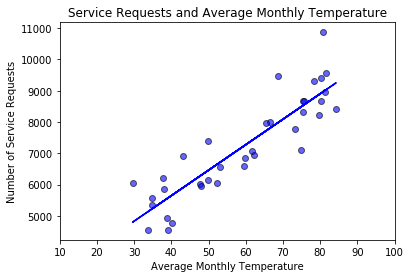

In [133]:
plt.scatter(merged_results['Avg_Temp'], merged_results['REQUESTID'], marker="o", facecolor = "b", edgecolor = "black", alpha=0.60)
plt.title("Service Requests and Average Monthly Temperature")
plt.ylabel("Number of Service Requests")
plt.xlabel("Average Monthly Temperature")
plt.xlim(10, 100)
(slope, intercept, _, _, _) = linregress(merged_results['Avg_Temp'], merged_results['REQUESTID'])
fit = slope * merged_results['Avg_Temp'] + intercept
plt.plot(merged_results['Avg_Temp'], fit, 'b')
plt.savefig("weatherrequest.png")
plt.show()


In [134]:
nona_date_results = pd.DataFrame(nona_results)

In [135]:
nona_date_results['DATEINVTDONE'] = pd.to_datetime(nona_date_results['DATEINVTDONE'], errors='coerce', infer_datetime_format=True)
nona_date_results['DATEINVTDONE'] = nona_date_results['DATEINVTDONE'].dt.date


In [136]:
nona_date_results['DATETIMECLOSED'] = pd.to_datetime(nona_date_results['DATETIMECLOSED'], errors='coerce', infer_datetime_format=True)
nona_date_results['DATETIMECLOSED'] = nona_date_results['DATETIMECLOSED'].dt.date


In [137]:
nona_date_results['DATETIMEINIT'] = pd.to_datetime(nona_date_results['DATETIMEINIT'], errors='coerce', infer_datetime_format=True)
nona_date_results['DATETIMEINIT'] = nona_date_results['DATETIMEINIT'].dt.date


In [138]:
nona_date_results['PRJCOMPLETEDATE'] = pd.to_datetime(nona_date_results['PRJCOMPLETEDATE'], errors='coerce', infer_datetime_format=True)
nona_date_results['PRJCOMPLETEDATE'] = nona_date_results['PRJCOMPLETEDATE'].dt.date


In [139]:
nona_date_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday,YearMonth
0,PHONE,2016-01-01,2016-01-01,2016-01-01,Signal Dark,2016-01-06,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01,2016_01
1,PHONE,2016-01-01,2016-01-01,2016-01-01,Whole block lights out,2016-01-05,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01
3,PHONE,2016-01-04,2016-01-05,2016-01-01,Whole block lights out,2016-01-05,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01
6,WEB,2016-01-08,2016-01-08,2016-01-01,Hole-bottom of cont,2016-01-12,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01,2016_01
7,WEB,2016-01-04,2016-01-04,2016-01-01,Dead Animal,2016-01-06,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01,2016_01


In [140]:
year2 = clean_columns.dropna()

In [141]:
years3 = years2[(years2.Ward != 'a') & (years2.Ward != '20 & 9') &
                (years2.Ward != '7 & 6') & (years2.Ward != '9 & 20') &
                (years2.Ward != '6 & 7') & (years2.Ward != '9 & 7') &
                (years2.Ward != '11 or 12') & (years2.Ward != '16,10,23') &
                (years2.Ward != '13 & 11') & (years2.Ward != '7 & 9')]

wards = years3.groupby(years3.Ward.astype(float).astype(int))
requests = wards["Request ID"].count().astype(float)
ward_request = pd.DataFrame({"Total":requests})

requests

Ward
1     12343.0
2     14182.0
3     14532.0
4     13731.0
5      8466.0
6     12299.0
7     16440.0
8     10800.0
9     14391.0
10     9694.0
11    11654.0
12     9029.0
13    10593.0
14     9655.0
15    11485.0
16    10489.0
17     9137.0
18    10672.0
19     7861.0
20    14108.0
21    13245.0
22    12924.0
23     9782.0
24    12915.0
25    10730.0
26    10867.0
27    15226.0
28     8978.0
Name: Request ID, dtype: float64

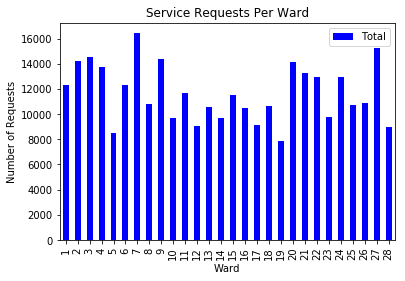

In [161]:
ward_request.plot(kind="bar", facecolor="b")
plt.title("Service Requests Per Ward")
plt.ylabel("Number of Requests")

plt.savefig ("ServiceRequestsPerWard.png")

In [143]:
years4 = years3.sort_values("Request Type")

potholes_all = years4[(years4["Request Type"].str.contains("Pothole") == True)]
potholes_2016 = years4[(years4["Date Requested"].str.contains("2016") == True) & (years4["Request Type"].str.contains("Pothole") == True)]
potholes_2017 = years4[(years4["Date Requested"].str.contains("2017") == True) & (years4["Request Type"].str.contains("Pothole") == True)]
potholes_2018 = years4[(years4["Date Requested"].str.contains("2018") == True) & (years4["Request Type"].str.contains("Pothole") == True)]

count_all = potholes_all["Request Type"].value_counts()
count_2016 = potholes_2016["Request Type"].value_counts()
count_2017 = potholes_2017["Request Type"].value_counts()
count_2018 = potholes_2018["Request Type"].value_counts()

labels = ["Residential Potholes","Major Street Potholes", "Alley Potholes"]

color_set = ["lightblue", "aqua", "b"]

In [144]:
count_all

Potholes - Residnl     7382
Potholes - Major St    3773
Potholes - Alley       1372
Name: Request Type, dtype: int64

In [145]:
count_2016

Potholes - Residnl     2518
Potholes - Major St    1178
Potholes - Alley        521
Name: Request Type, dtype: int64

In [146]:
count_2017

Potholes - Residnl     2315
Potholes - Major St    1369
Potholes - Alley        469
Name: Request Type, dtype: int64

In [147]:
count_2018

Potholes - Residnl     2549
Potholes - Major St    1226
Potholes - Alley        382
Name: Request Type, dtype: int64

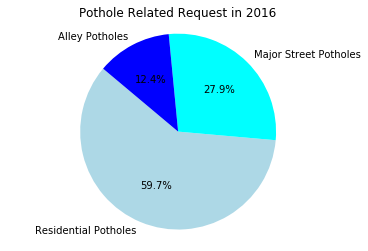

In [160]:
plt.figure()
plt.pie(count_2016, labels=labels, colors=color_set, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pothole Related Request in 2016")
plt.axis("equal")

plt.savefig ("PotholeRelatedRequest2016.png")

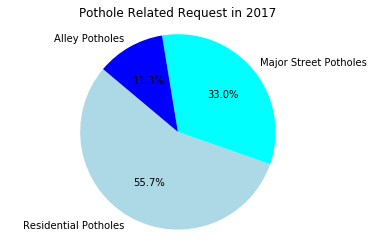

In [159]:
plt.figure()
plt.pie(count_2017, labels=labels,colors=color_set, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pothole Related Request in 2017")
plt.axis("equal")

plt.savefig ("PotholeRelatedRequest2017.png")

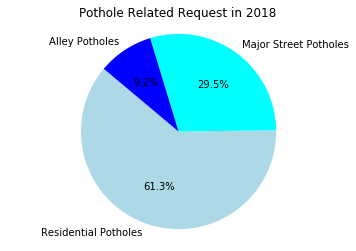

In [158]:
plt.figure()
plt.pie(count_2018, labels=labels,colors=color_set, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pothole Related Request in 2018")
plt.axis("equal")

plt.savefig ("PotholeRelatedRequest2018.png")

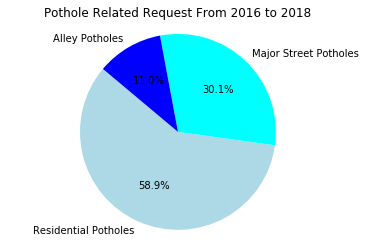

In [157]:
plt.figure()
plt.pie(count_all, labels=labels, colors=color_set, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pothole Related Request From 2016 to 2018")
plt.axis("equal")

plt.savefig ("PotholeRelatedRequest2016_2018.png")

In [152]:
csv_path = "/Users/BK/Data/Project_One/csb_data/Ward XY.csv"
ward_xy_df = pd.read_csv(csv_path)

ward_xy_df.head(29)

,Ward,Lat,Long
0,1,38.674678,-90.253169
1,2,38.699676,-90.219104
2,3,38.663135,-90.210726
3,4,38.660509,-90.239973
4,5,38.641149,-90.194131
5,6,38.626080,-90.218250
6,7,38.612836,-90.197704
7,8,38.610891,-90.254460
8,9,38.596848,-90.217006
9,10,38.611537,-90.280413


In [153]:
ward_xy_index = ward_xy_df.set_index("Ward")
locations = ward_xy_df[["Lat", "Long"]]

In [154]:
#request_total = ward_request["Total"].astype(float)

In [155]:
# Configure gmaps
gmaps.configure(api_key='gkey')
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
#heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 #dissipating=False, max_intensity=10,
                                 #point_radius=1)
heat_layer = gmaps.heatmap_layer(locations, weights=requests, 
                                 dissipating=False, max_intensity=.5,
                                 point_radius=.017)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig



Figure(layout=FigureLayout(height='420px'))